# Logistic Regression

## Importing libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing dataset

In [94]:
# df=pd.read_excel('S:\Artificial Intelligence\Dataset_master.xlsx', sheet_name='Instagram Ads Logistic Regressi')
# df.to_csv("InstaADS.csv",index=False)
data_set=pd.read_csv("InstaADS.csv")
# print(data_set)
x=data_set.iloc[:,: -1].values
y=data_set.iloc[:,-1].values


## Splitting the dataset into Training & Test set

In [95]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.3 , random_state=10)

## Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)
x_test

array([[-1.51750294,  0.25171232],
       [-0.88870338, -0.54728564],
       [-0.63718355,  0.11851936],
       [ 0.49465565, -0.70708523],
       [ 0.11737592, -0.20107982],
       [-1.76902276, -0.92017799],
       [ 0.11737592, -0.0146736 ],
       [-1.39174303, -0.62718543],
       [-0.25990382, -1.00007778],
       [-1.01446329, -0.94678462],
       [ 0.9976953 ,  0.46472518],
       [-1.01446329,  0.03861957],
       [-0.76294347,  0.27831895],
       [ 0.9976953 ,  1.3969161 ],
       [-0.00838399, -0.65387197],
       [-0.13414391, -0.17447319],
       [-0.00838399,  1.82302171],
       [-1.51750294, -1.13327074],
       [-0.00838399, -0.62718543],
       [ 0.11737592,  0.03861957],
       [ 1.37497504,  0.25171232],
       [ 0.11737592,  1.79641508],
       [-1.01446329,  1.05071028],
       [ 2.0037746 ,  1.37030947],
       [ 0.11737592,  1.74312192],
       [ 2.0037746 ,  0.67781794],
       [ 0.9976953 ,  1.02402375],
       [-0.00838399, -1.55937636],
       [-1.01446329,

## Logistic Regression Training on Training set

In [97]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(random_state=10)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=10)

## Predicting

In [98]:
print(classifier.predict(sc.transform([[50,11000]])))

[1]


## Predicting Test set results

In [99]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test , y_pred)

[[36  4]
 [ 2 18]]


0.9

## Visualizing Test Set results

C:\Users\saiki\AppData\Local\Temp\ipykernel_13404\799363896.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


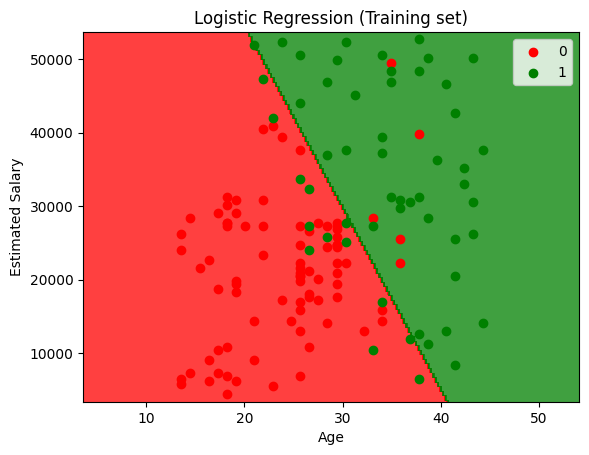

In [101]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising Training set results